# Restaurant Revenue Prediction

## Importing

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

# About Dataset

This dataset contains information about various restaurants and aims to predict the revenue based on several features. Each row represents a unique restaurant with various attributes that may influence its revenue.

## Columns
* **Name:** The name of the restaurant.
* **Location:** The location of the restaurant (e.g., Rural, Downtown).
* **Cuisine:** The type of cuisine offered (e.g., Japanese, Mexican, Italian).
* **Rating:** The average rating of the restaurant.
* **Seating Capacity:** The number of seats available in the restaurant.
* **Average Meal Price:** The average price of a meal at the restaurant.
* **Marketing Budget:** The marketing budget allocated for the restaurant.
* **Social Media Followers:** The number of social media followers.
* **Chef Experience Years:** The number of years of experience of the head chef.
* **Number of Reviews:** The total number of reviews the restaurant has received.
* **Avg Review Length:** The average length of reviews.
* **Ambience Score:** A score representing the ambience of the restaurant.
* **Service Quality Score:** A score representing the quality of service.
* **Parking Availability:** Indicates if parking is available (Yes/No).
* **Weekend Reservations:** The number of reservations made on weekends.
* **Weekday Reservations:** The number of reservations made on weekdays.
* **Revenue:** The total revenue generated by the restaurant.

## Objective

The main objective of this dataset is to predict the revenue of a restaurant based on the given features.

# Loading in and exploring the dataset

In [130]:
df = pd.read_csv('Kaggle/restaurant_data.csv')

df

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,No,37,21,414977.92
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48


In [131]:
df.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


In [132]:
df.isna().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

In [133]:
df.dtypes

Name                       object
Location                   object
Cuisine                    object
Rating                    float64
Seating Capacity            int64
Average Meal Price        float64
Marketing Budget            int64
Social Media Followers      int64
Chef Experience Years       int64
Number of Reviews           int64
Avg Review Length         float64
Ambience Score            float64
Service Quality Score     float64
Parking Availability       object
Weekend Reservations        int64
Weekday Reservations        int64
Revenue                   float64
dtype: object

In [134]:
for i in df.columns:
    print(f'{i} : {df[i].nunique()}')

Name : 8368
Location : 3
Cuisine : 6
Rating : 21
Seating Capacity : 61
Average Meal Price : 3966
Marketing Budget : 4396
Social Media Followers : 7799
Chef Experience Years : 19
Number of Reviews : 949
Avg Review Length : 8368
Ambience Score : 91
Service Quality Score : 91
Parking Availability : 2
Weekend Reservations : 89
Weekday Reservations : 89
Revenue : 8368


**It looks like we have to deal only with the object type of columns. For now I can drop the name columns the other columns will come later.**

In [135]:
df = df.drop('Name', axis = 1)

df.head(5)

,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


# Plotting

In [136]:
categorical_df = df[['Location', 'Cuisine', 'Parking Availability']]
numerical_df = df.drop(categorical_df.columns, axis = 1)

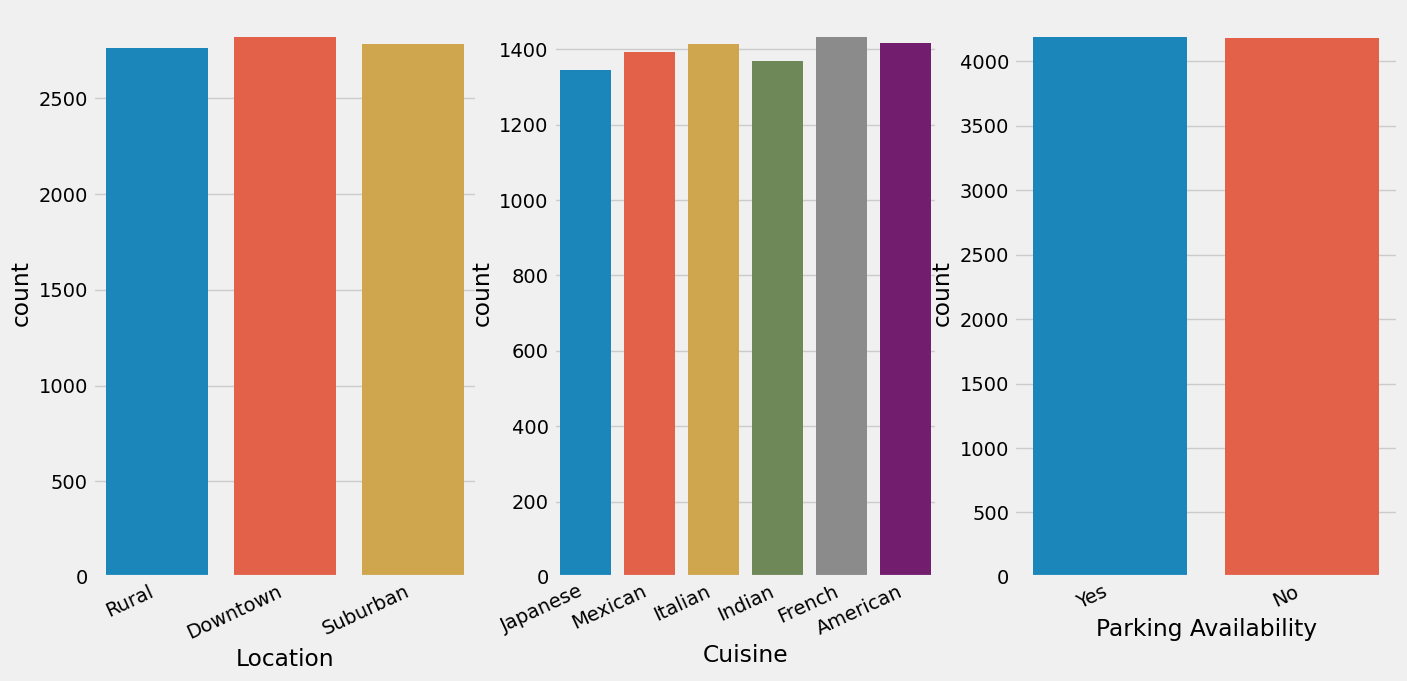

In [137]:
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(1, 3, figsize = (15, 7))
axes = axes.flatten()

for i,column in enumerate(categorical_df.columns):
    sns.countplot(x = categorical_df[column], ax = axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=25, ha='right')
    
plt.show()

**Our data set is very balanced on the categorical columns**

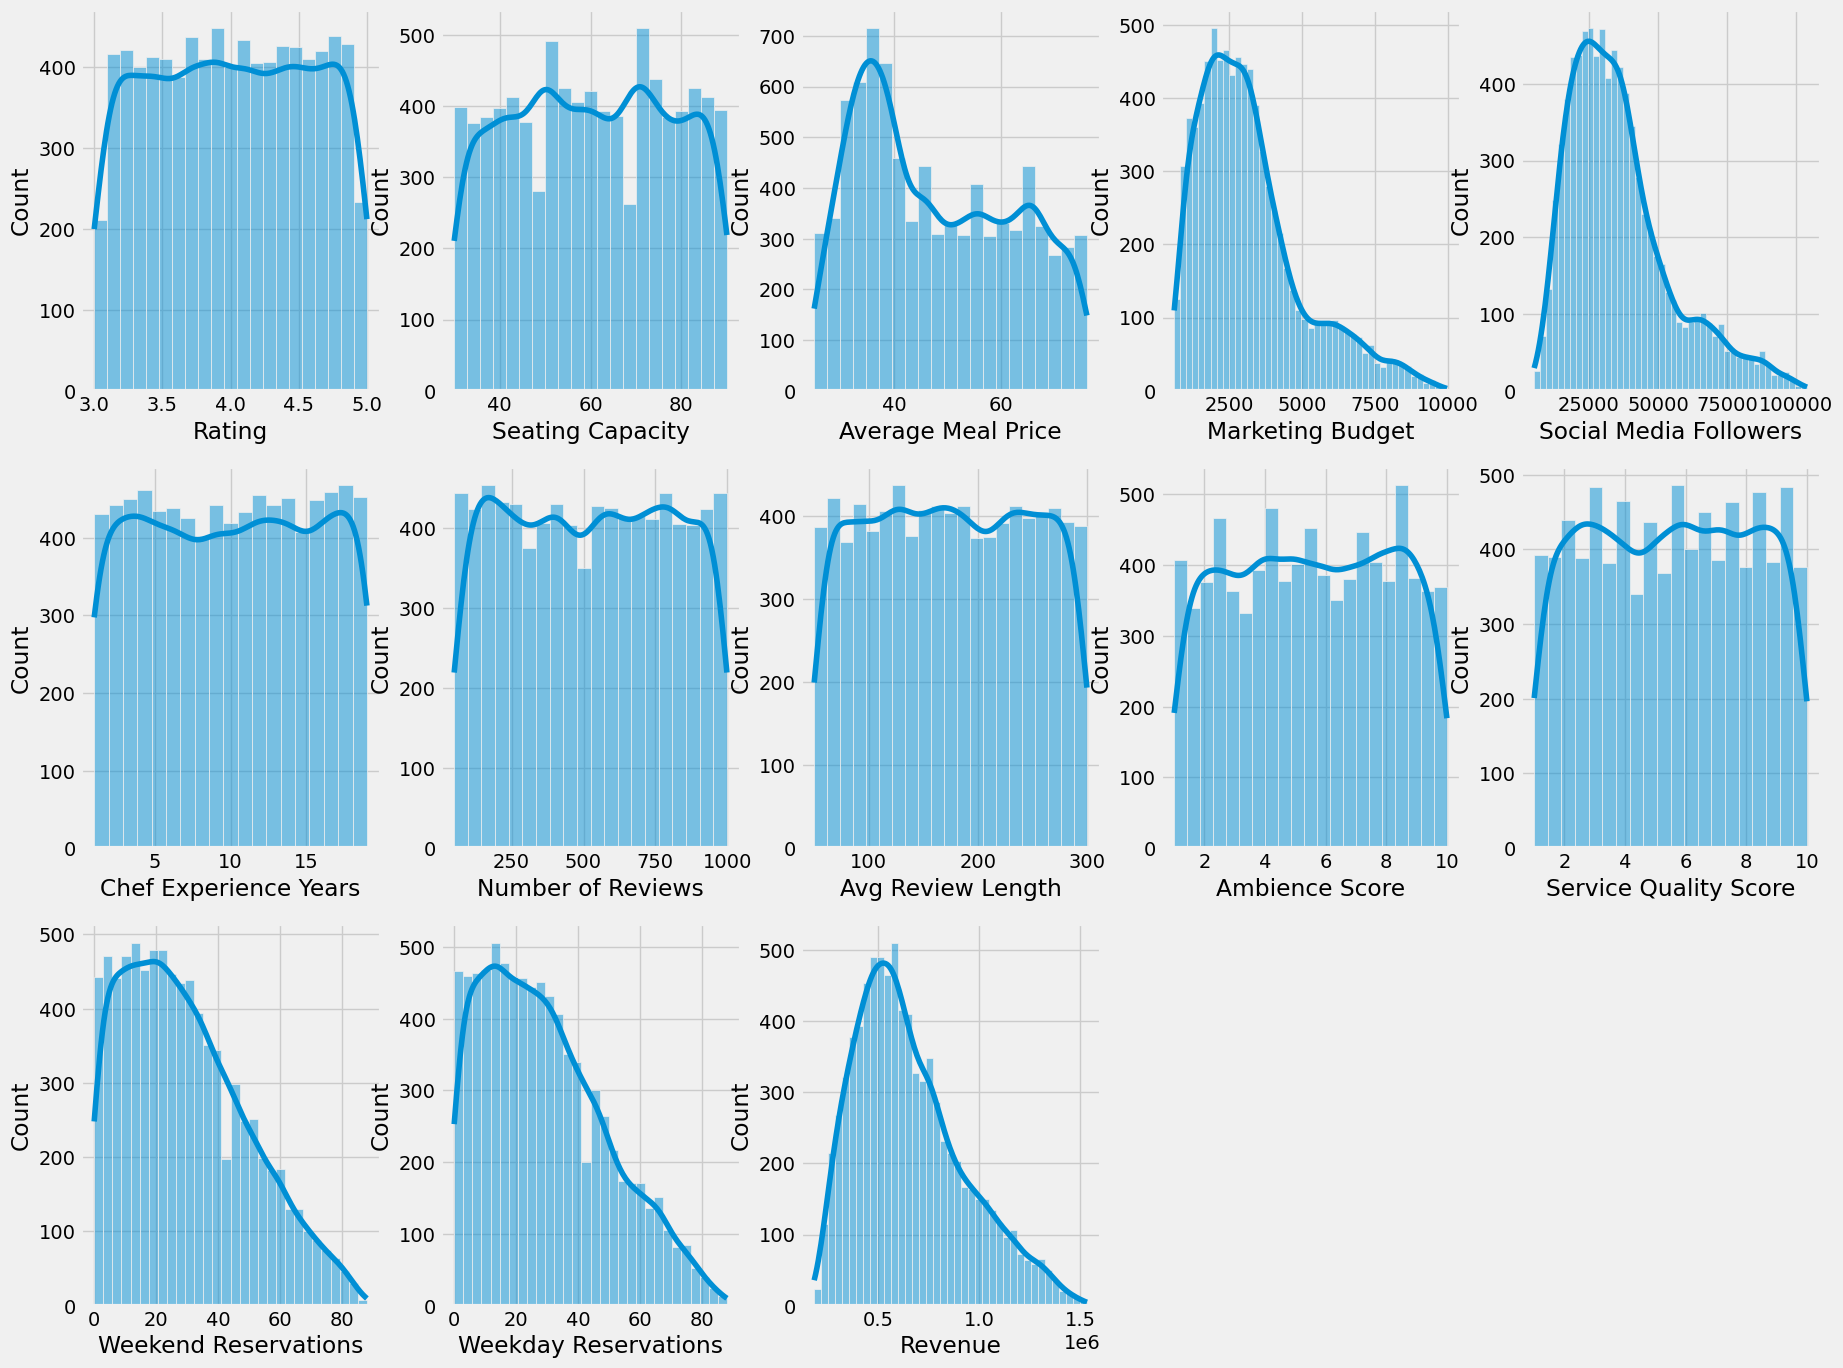

In [138]:
fig,axes = plt.subplots(3, 5, figsize = (20 ,16))
axes = axes.flatten()

for i, column in enumerate(numerical_df.columns):
    sns.histplot(x = numerical_df[column], kde = True, ax = axes[i])
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.show()

**Some of the columns are uniformly distributed and some of them are right-skewed distributed.**

C:\Users\ZEPHYRUS\AppData\Local\Temp\ipykernel_17440\3340254716.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


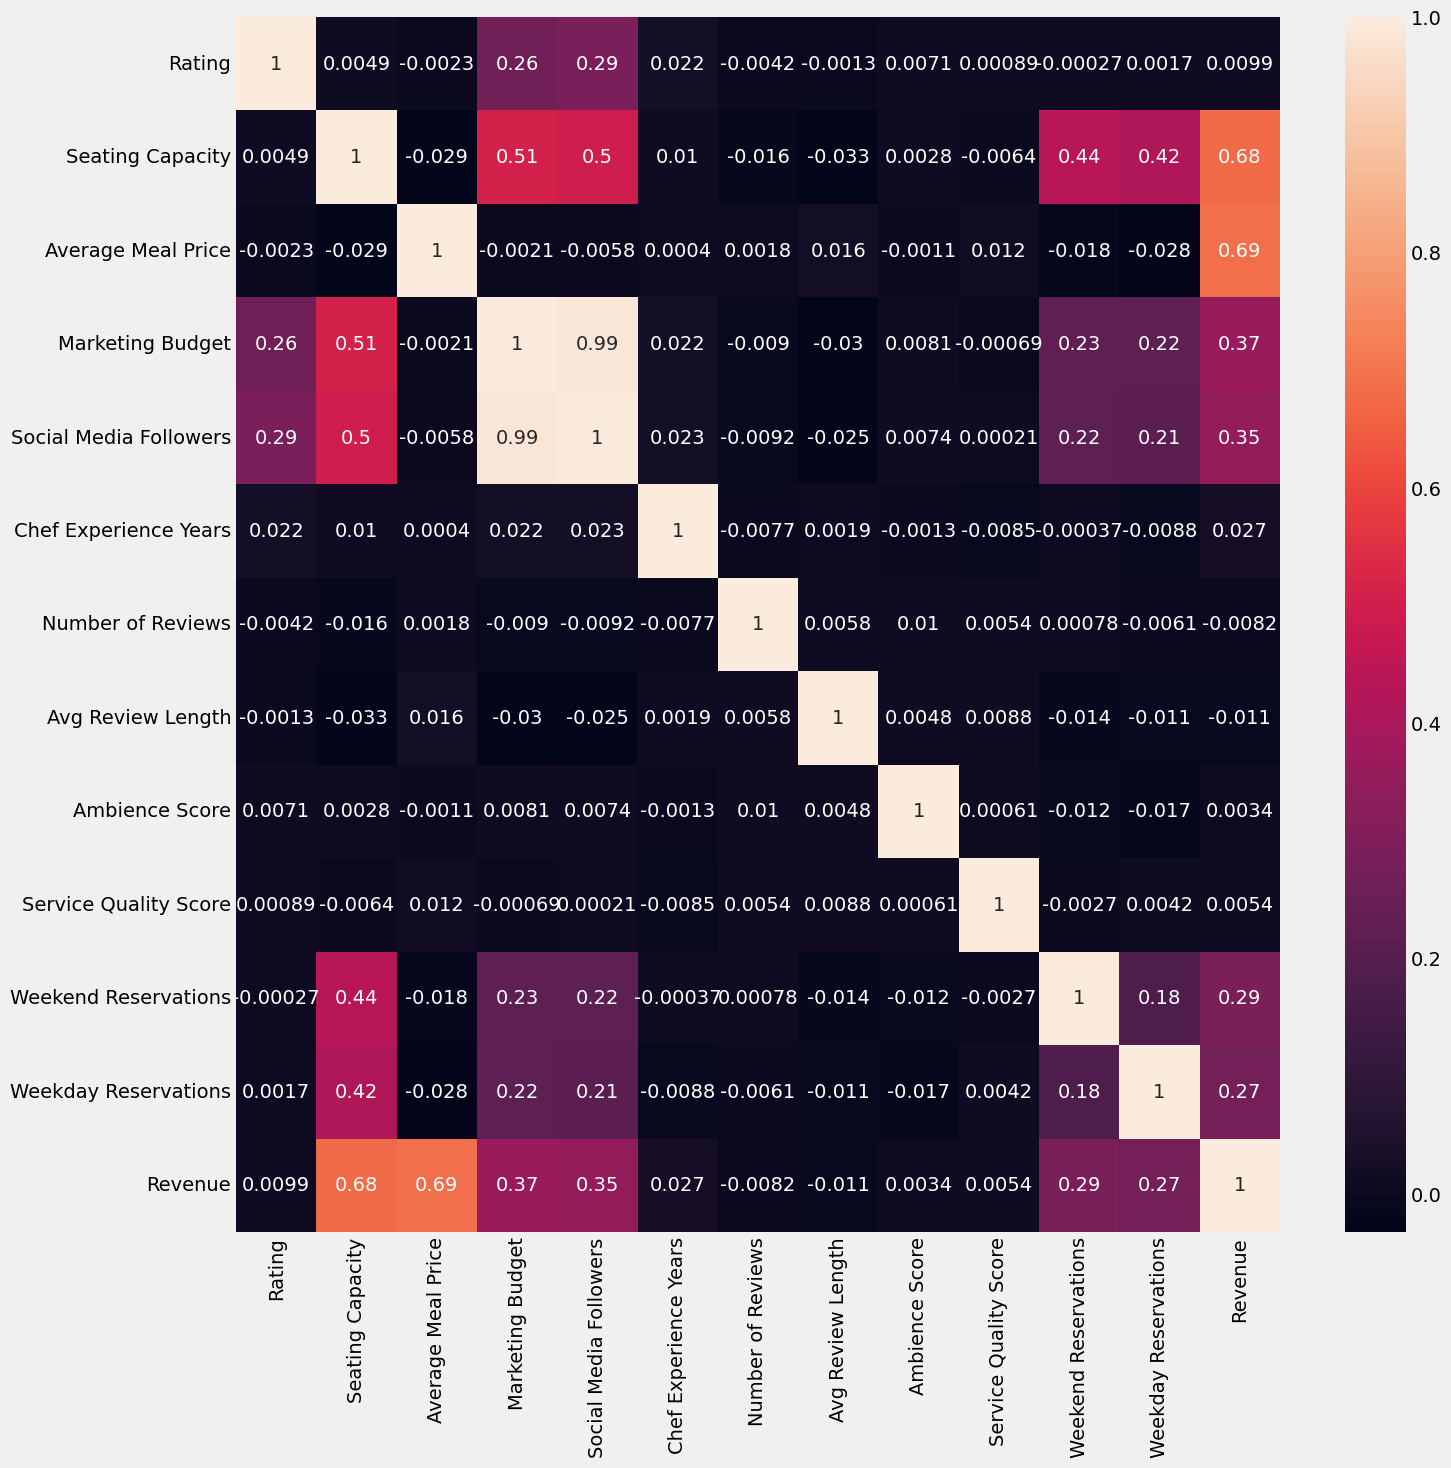

In [139]:
corr_matrix = df.corr()

plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, annot = True)
plt.show()

**Given that the target value is strongly correlated with the seating capacity, average meal price, marketing budget, social media followers, weekend reservations, and weekday reservations, these factors are likely key drivers of the outcome, and their optimization could significantly impact the target variable.**

# Data preprocessing

## One-Hot Encoding

In [140]:
object_columns = df[['Location', 'Cuisine', 'Parking Availability']]

encoder = OneHotEncoder(sparse = False)

encoded = encoder.fit_transform(object_columns)

new_df = pd.DataFrame(data = encoded, columns = encoder.get_feature_names_out(object_columns.columns))

new_df

C:\Users\ZEPHYRUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Location_Downtown,Location_Rural,Location_Suburban,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8363,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8364,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8365,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8366,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [141]:
df = pd.concat([df, new_df], axis = 1)

df = df.drop(object_columns, axis = 1)

df

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,...,Location_Rural,Location_Suburban,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes
0,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8364,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8365,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8366,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Creating train test split and data scaling

In [142]:
X = df.drop('Revenue', axis = 1)
y = df['Revenue']

scalerX = StandardScaler()
X[X.columns] = scalerX.fit_transform(X[X.columns])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6694, 23)
(1674, 23)
(6694,)
(1674,)


# Model implementation

In [143]:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso Regression' : Lasso(),
    'Ridge Regression' : Ridge(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'Decesion Tree Regressor' : DecisionTreeRegressor(),
    'XGB Regressor' : XGBRegressor()
}

def implement (dictionary, input_train, output_train, input_test, output_test):
    dictionary.fit(input_train, output_train)
    accuracy = dictionary.score(input_test, output_test)
    return accuracy

for name, model in models.items():
    model_accuracy = implement(model, X_train, y_train, X_test, y_test)
    print(f'{name} : {model_accuracy}')
    print('--'*30)


Linear Regression : 0.9559310657142485
------------------------------------------------------------
Lasso Regression : 0.9558928243049694
------------------------------------------------------------
Ridge Regression : 0.9558836482429612
------------------------------------------------------------
Random Forest Regressor : 0.999147305926231
------------------------------------------------------------
Decesion Tree Regressor : 0.9965852532499039
------------------------------------------------------------
XGB Regressor : 0.9990451859897955
------------------------------------------------------------


# Model performance

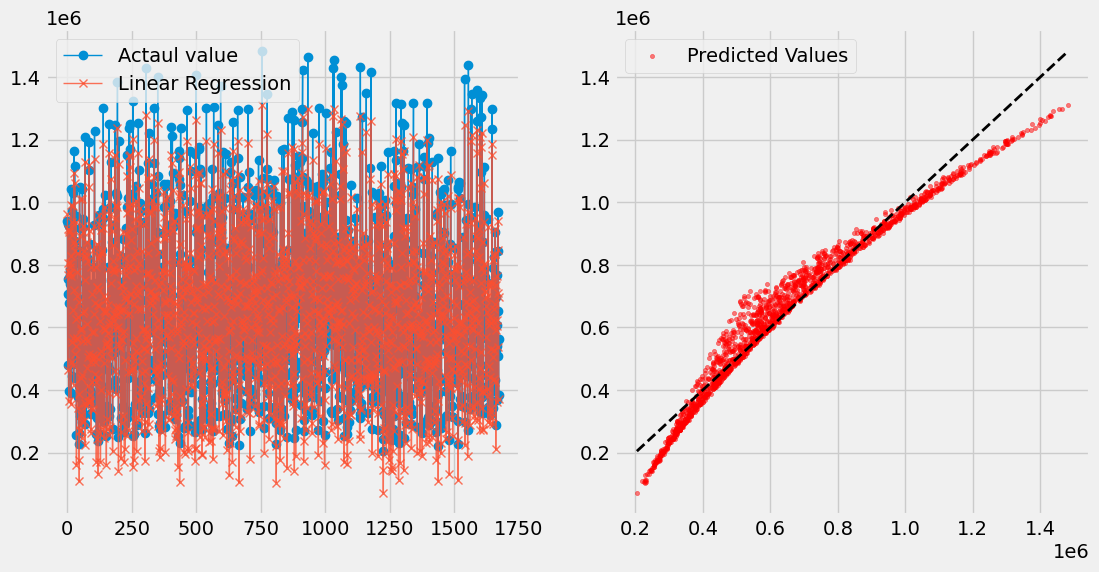

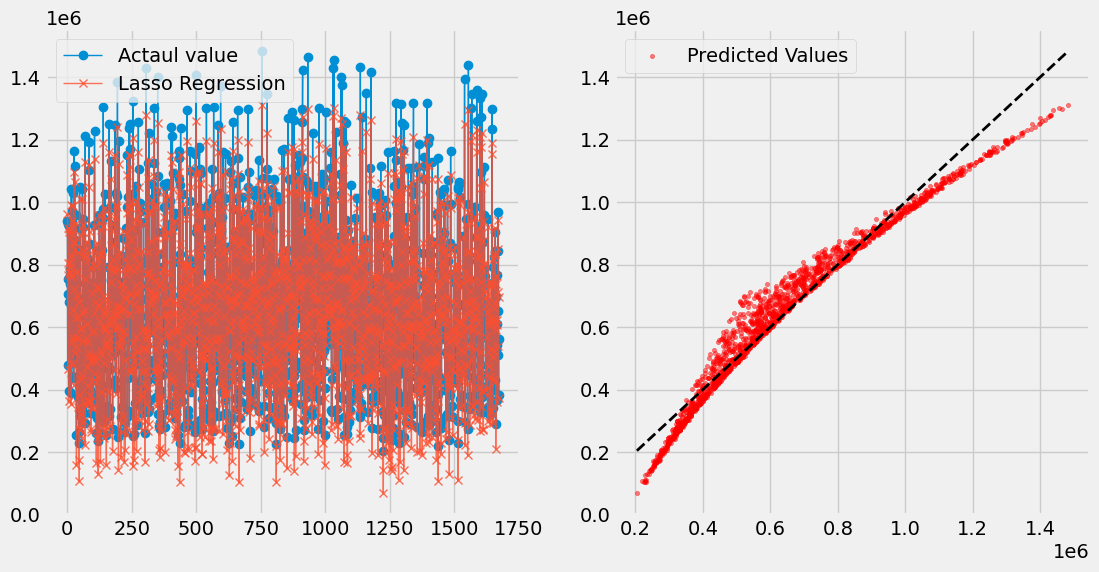

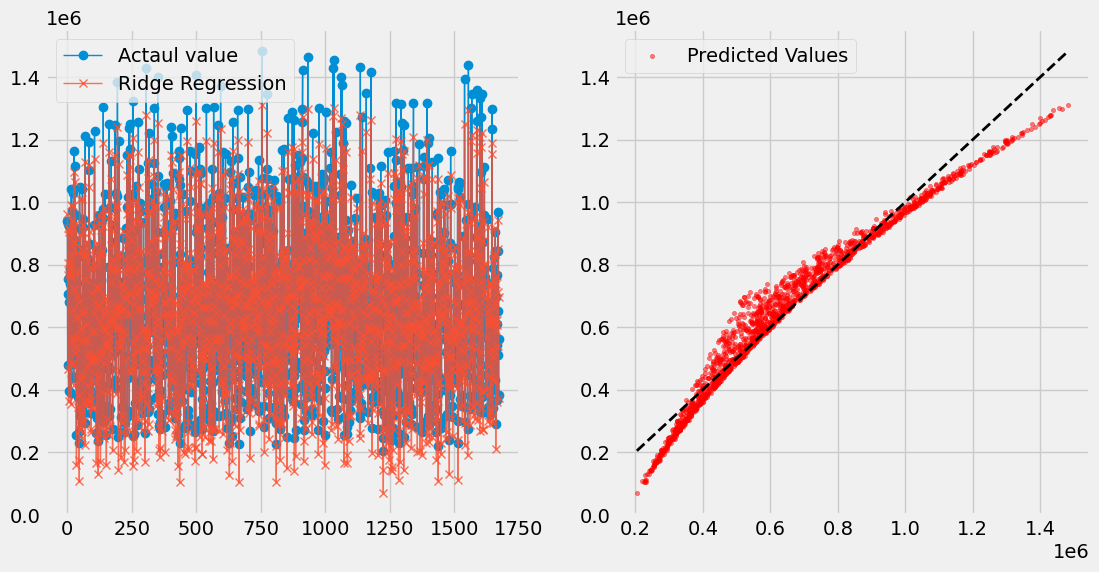

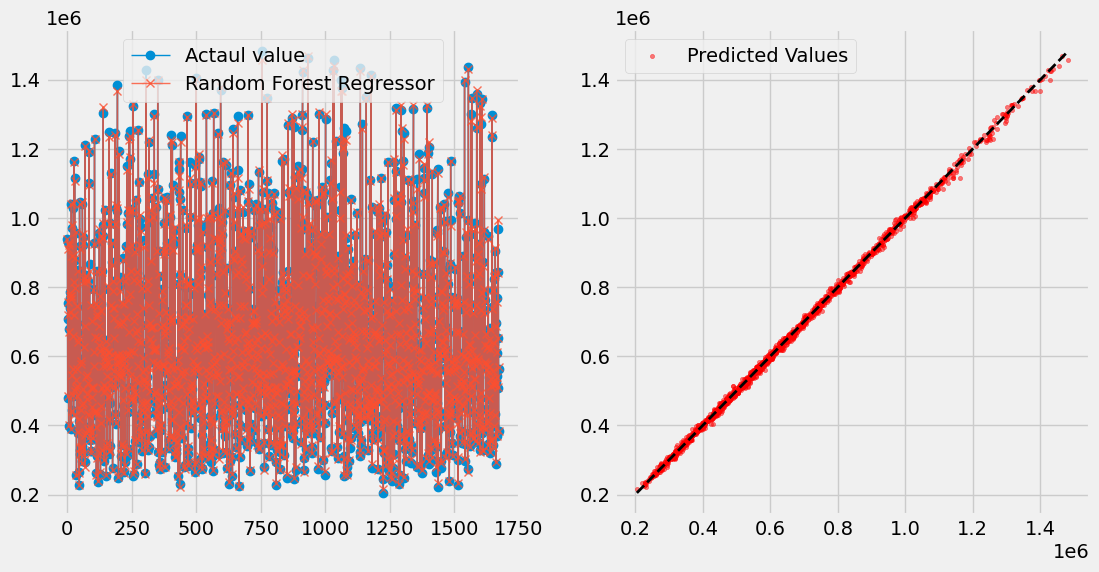

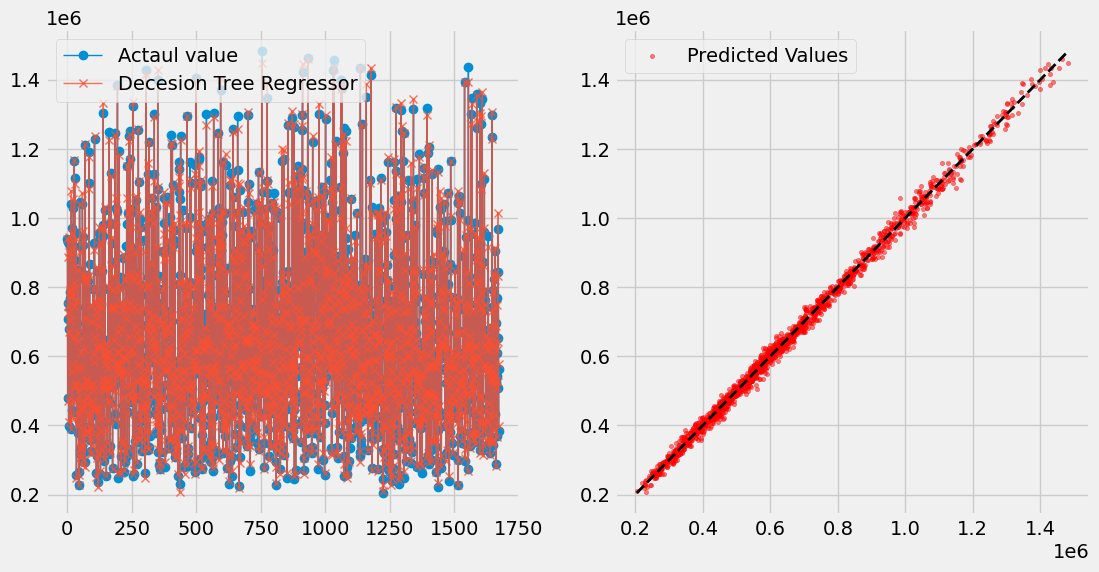

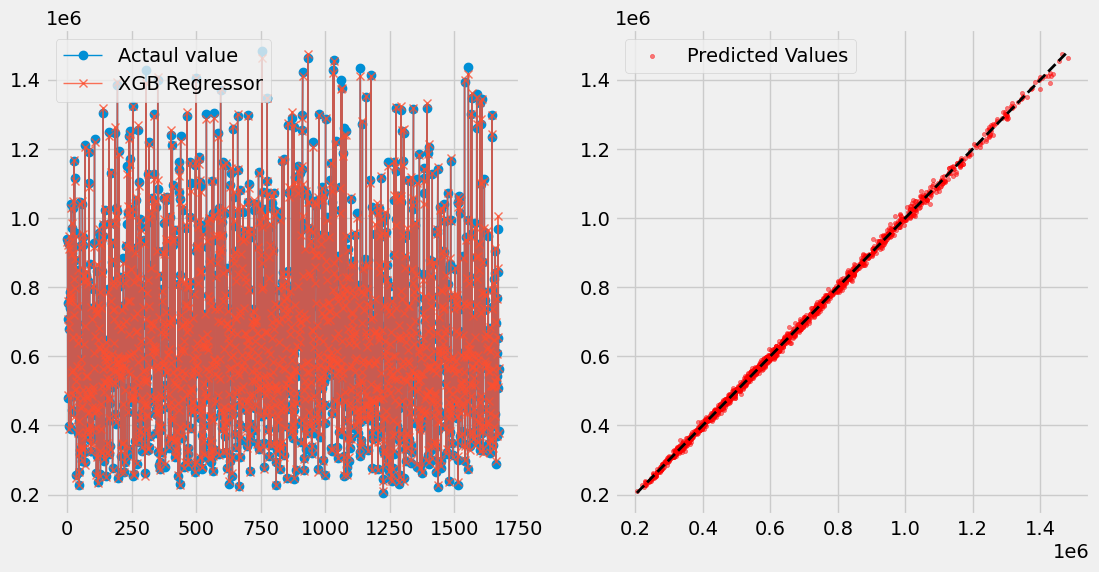

In [146]:
def pred(model, input_test):
    prediction = model.predict(input_test)
    return prediction

for name, model in models.items():
    model_prediction = pred(model, X_test)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
    
    ax1.plot(y_test.values, label = 'Actaul value', marker = 'o', linewidth = 1)
    ax1.plot(model_prediction, label = name, marker = 'x', linewidth = 1, alpha = 0.8)
    ax1.legend()
    
    ax2.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='black', linewidth=2, linestyle='--')
    ax2.scatter(y_test.values, model_prediction, marker = '.', label = 'Predicted Values', color = 'red', alpha = 0.5)
    ax2.legend()
    
    plt.show()
    

# Results

**Our best model was the Random Forest Regressor with a 99.91% accuracy, followed closely by the XGBoost Regressor. Our models were highly effective in predicting a restaurant's revenue based on the given features, demonstrating strong performance and reliability.**